In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, classification_report

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
heart_failure = pd.read_csv('https://raw.githubusercontent.com/VitorFRodrigues/Polo_Tech_Americanas/main/Polo_Tech/Modulo_05/Datasets/heart_failure.csv')

In [5]:
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
from sklearn.preprocessing import StandardScaler 

In [7]:
X = heart_failure.drop('DEATH_EVENT', axis=1)
y = heart_failure['DEATH_EVENT']

In [8]:
heart_failure['DEATH_EVENT'].value_counts(normalize=True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y, random_state=42)

In [10]:
y_test.value_counts(normalize=True)

0    0.683333
1    0.316667
Name: DEATH_EVENT, dtype: float64

In [11]:
# ss = StandardScaler()

In [12]:
# x_train_std = ss.fit_transform(x_train)

In [13]:
# x_test_std = ss.transform(x_test)

In [14]:
model = LogisticRegression(max_iter=5000)

In [15]:
kf = KFold(n_splits=30, shuffle=True, random_state=42)

In [16]:
results_cv = cross_validate(estimator=model, X=X, y=y,
                           cv=kf, scoring="accuracy",
                           return_train_score=True, return_estimator=True)

In [17]:
resultados = pd.DataFrame(results_cv)

In [18]:
resultados.describe()

,fit_time,score_time,test_score,train_score
count,30.000000,30.000000,30.000000,30.000000
mean,0.014115,0.002106,0.815556,0.825164
std,0.005156,0.000691,0.152057,0.006605
min,0.007720,0.001546,0.500000,0.816609
25%,0.011486,0.001822,0.700000,0.820069
50%,0.012398,0.001972,0.850000,0.823529
75%,0.014274,0.002093,0.900000,0.827437
max,0.035055,0.005427,1.000000,0.840830


In [21]:
breast_cancer = pd.read_csv('https://raw.githubusercontent.com/VitorFRodrigues/Polo_Tech_Americanas/main/Polo_Tech/Modulo_05/Datasets/breast_cancer.csv')

In [22]:
breast_cancer = breast_cancer.drop(columns=['id'], axis=1)

In [23]:
X = breast_cancer.drop('diagnosis', axis=1)
y = breast_cancer['diagnosis']

In [24]:
scaler = StandardScaler()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state=42)

In [26]:
x_train_std = scaler.fit_transform(x_train)

In [27]:
x_test_std = scaler.transform(x_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [29]:
knc =KNeighborsClassifier(n_neighbors=9, metric='manhattan')

In [30]:
knc.fit(x_train_std, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [31]:
y_pred = knc.predict(x_test_std)

In [32]:
mc = confusion_matrix(y_test, y_pred)

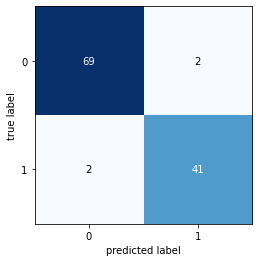

In [33]:
plot_confusion_matrix(conf_mat=mc)
plt.show()

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



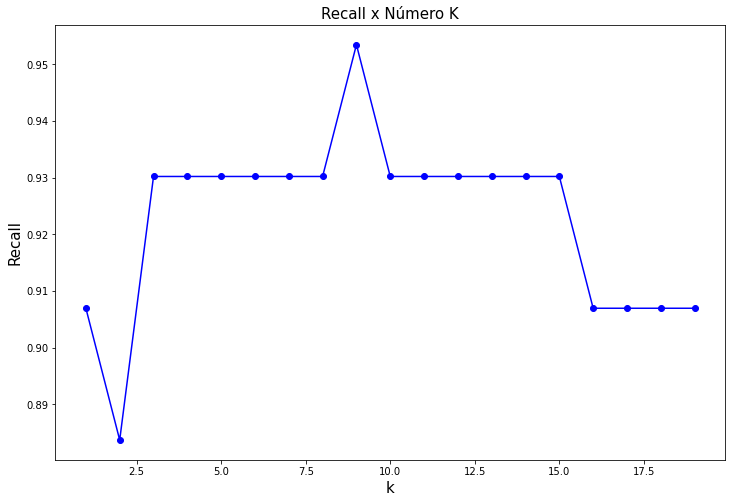

Melhor k: 9


In [35]:
from sklearn.metrics import recall_score
import numpy as np

ks = []
recalls = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_test_std)
    rec = recall_score(y_test, y_pred, pos_label='M')
    recalls.append(rec)
    ks.append(k)

plt.figure(figsize=(12,8))
plt.plot(ks, recalls, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Recall', fontsize = 15)
plt.title('Recall x Número K', fontsize = 15)
plt.show(True)
best_k = np.argmax(recalls)+1
print('Melhor k:', best_k)

In [79]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [81]:
penguins_sem_NAN = penguins.dropna()

In [82]:
penguins_sem_NAN['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [83]:
sexo = {
    'Male': 1,
    'Female': 0
}
penguins_sem_NAN['sex'] = penguins_sem_NAN['sex'].map(sexo)

<ipython-input-83-0db11ca54ce4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_sem_NAN['sex'] = penguins_sem_NAN['sex'].map(sexo)


In [84]:
x = penguins_sem_NAN.drop(['species', 'island'], axis = 1)
y = penguins_sem_NAN['species']

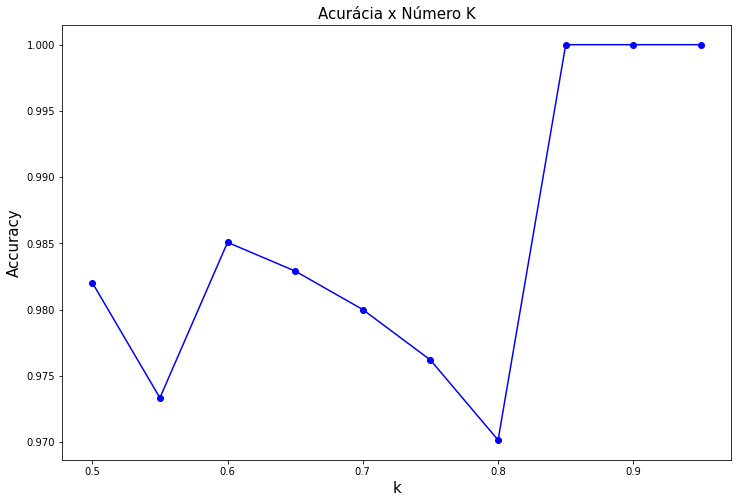

Melhor k:  1.0


In [94]:
ks = []
accuracy = []
for k in np.arange(0.5, 1, 0.05):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=k, random_state=42, stratify = y)
    modelo_logistica = LogisticRegression(multi_class = 'auto', max_iter=1000)
    modelo_logistica.fit(x_train, y_train)
    y_pred = modelo_logistica.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    ks.append(k)
  
plt.figure(figsize=(12,8))
plt.plot(ks, accuracy, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Acurácia x Número K', fontsize = 15)
plt.show(True)
best_k = np.argmax(accuracy)+1
print(f'Melhor k: ', accuracy[best_k])

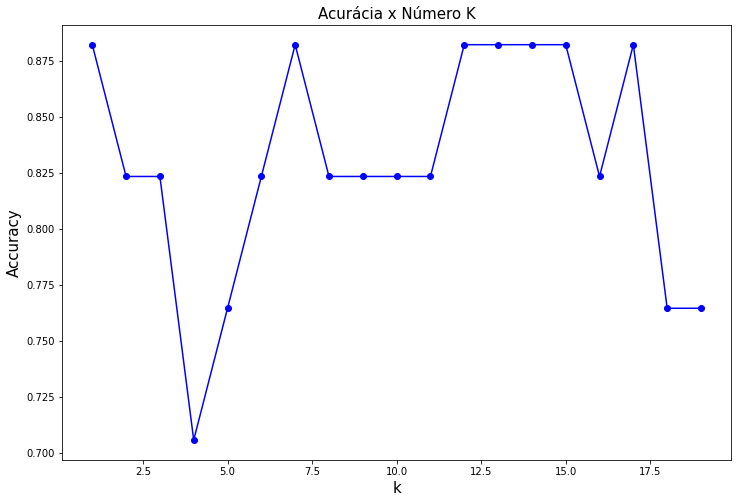

Melhor k:  1.0


In [95]:
from sklearn.metrics import accuracy_score

ks = []
accuracys = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracys.append(acc)
    ks.append(k)

plt.figure(figsize=(12,8))
plt.plot(ks, accuracys, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Acurácia x Número K', fontsize = 15)
plt.show(True)
best_k = np.argmax(accuracy)+1
print(f'Melhor k: ', accuracy[best_k])